# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [22]:
data.shape

(3864, 19)

In [23]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [24]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

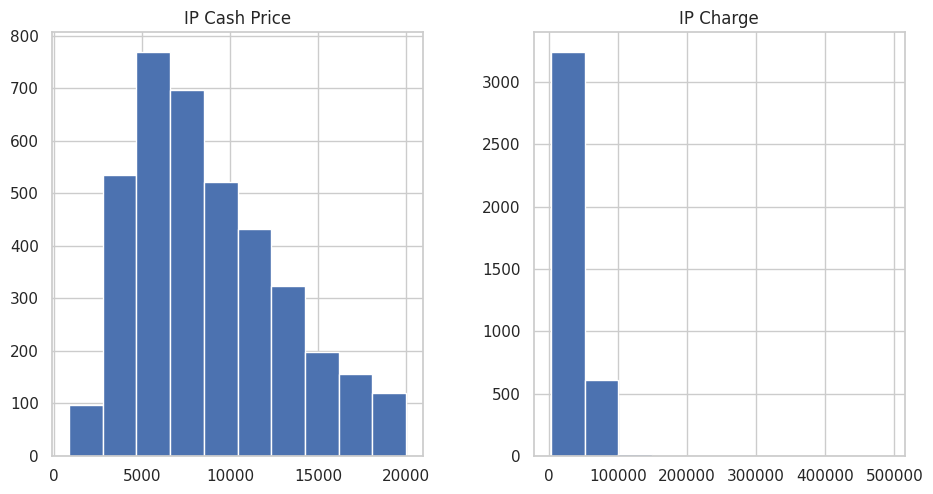

In [25]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

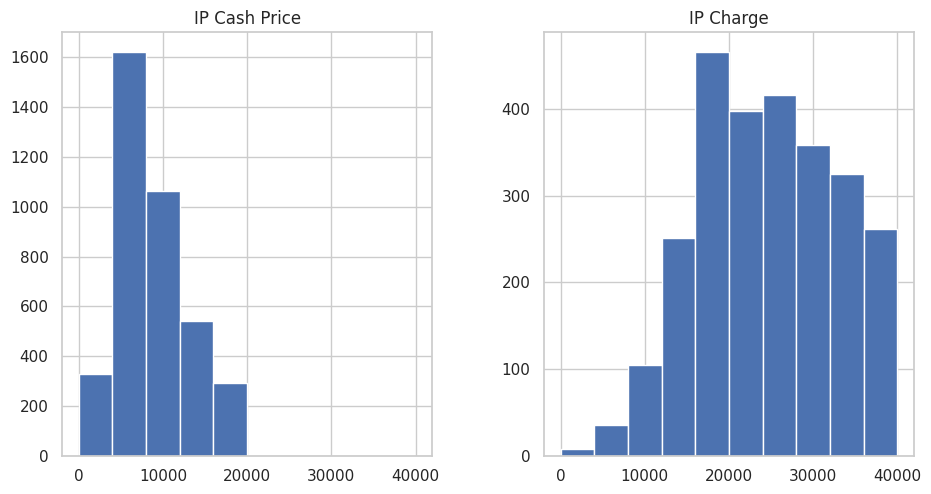

In [26]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [27]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:
The Histograms allow us to explore and compare the price distributions between the IP cash price and IP charge columns in the data. We can see some differences in the shape and range of prices and charge. This helps understand the characteristics and relationships in the data.



---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

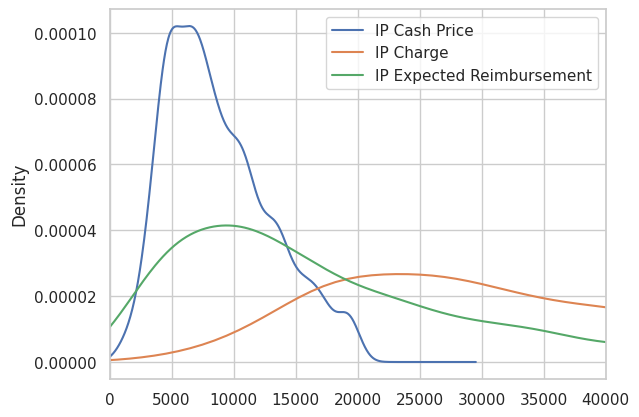

In [28]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:
From the graph,

The IP Cash Price distribution is right-skewed, meaning many procedures have relatively low cash prices, but some are much more expensive. This suggests variability in costs.
IP Charge is generally lower than IP Cash Price. This makes sense, as hospitals negotiate discounted rates with insurance companies. IP Expected Reimbursement centers between the other two distributions. This aligns with insurance paying a negotiated rate that is lower than the IP Charge but higher than the cash price. The gap between IP Cash Price and IP Expected Reimbursement highlights the value of having insurance - it covers a significant portion of costs. However, there is still a gap between IP Expected Reimbursement and IP Charge that the insured customer must cover through deductibles, copays, etc. Overall, this shows the financial dynamics between hospitals, insurance companies, and patients. Insureds pay less than cash-payers but still have out-of-pocket expenses on top of premiums. Meanwhile, hospitals charge higher prices to the uninsured.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [29]:
data['Payer'].value_counts()

ALLWELL [15100]                      650
ARKANSAS TOTAL CARE [40700]          650
AETNA [65000]                        641
AR BLUE CROSS BLUE SHIELD [25001]    641
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: Payer, dtype: int64

In [30]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        Axes(0.125,0.11;0.775x0.77)
ALLWELL [15100]                      Axes(0.125,0.11;0.775x0.77)
AR BLUE CROSS BLUE SHIELD [25001]    Axes(0.125,0.11;0.775x0.77)
ARKANSAS TOTAL CARE [40700]          Axes(0.125,0.11;0.775x0.77)
HEALTHSCOPE [95700]                  Axes(0.125,0.11;0.775x0.77)
MULTIPLAN                            Axes(0.125,0.11;0.775x0.77)
Name: IP Expected Reimbursement, dtype: object

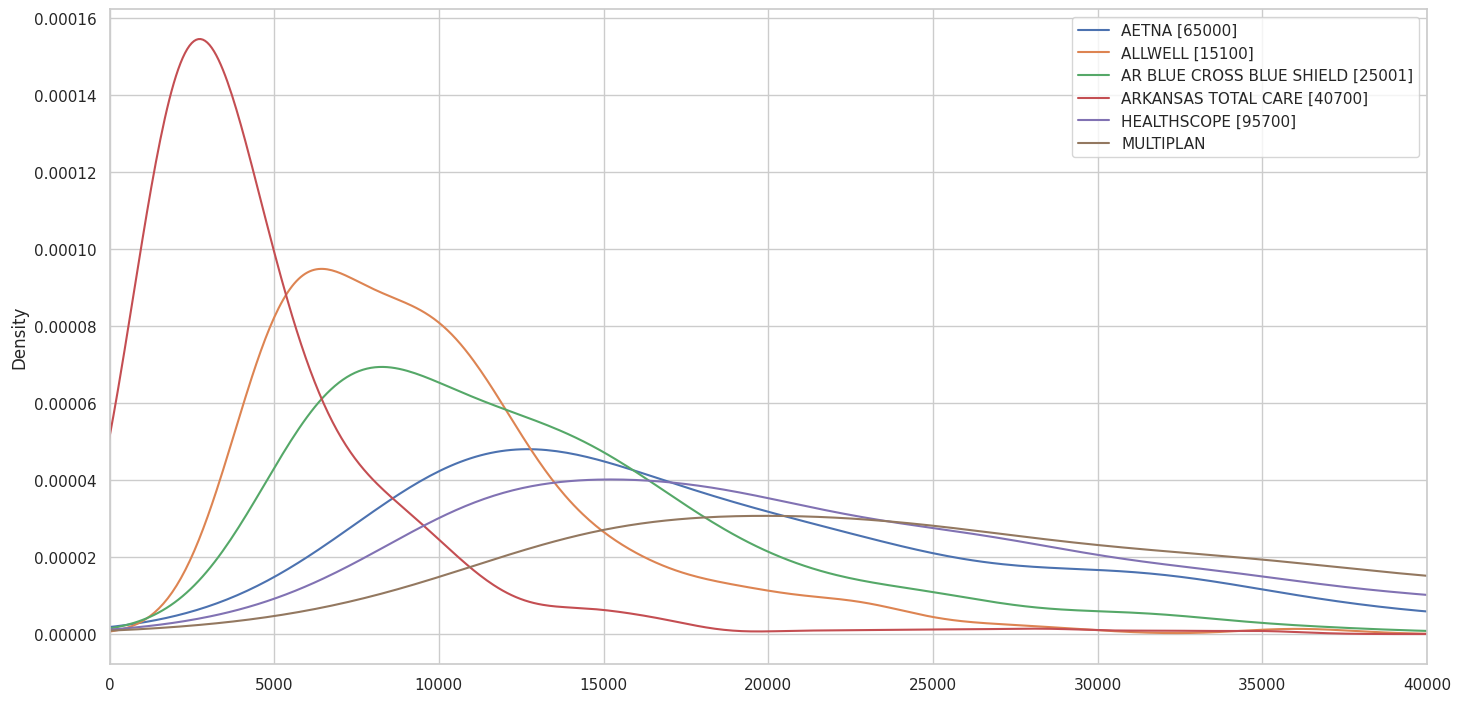

In [31]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:
Based on the KDE plots of expected reimbursements grouped by payer:

The distributions peak at different values for each payer, indicating varying typical/average reimbursement amounts. AETNA, AR BLUE CROSS BLUE SHIELD, and HEALTHSCOPE have distributions peaked more towards the right, at higher reimbursement values (~$15K-20K). This suggest their plan tend to pay out higher amount on average . Allwell and Arkansas total care peak much further left , under 10k.So their plans seem to reimburse less on average. Multiplan is kind of in the middle with peak around 12 k. The plots also show some payers like ALLWELL and ARKANSAS TOTAL CARE have very concentrated distributions, while others are more spread out. Overall, this indicates significant differences in typical reimbursement and overall payment patterns between the insurance plans. Some consistently reimburse more than others. This could be influenced by factors like negotiated provider rates, plan generosity, deductibles, etc. Analyzing reimbursement by payer gives insight into how much financial coverage patients can expect from different plans.


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

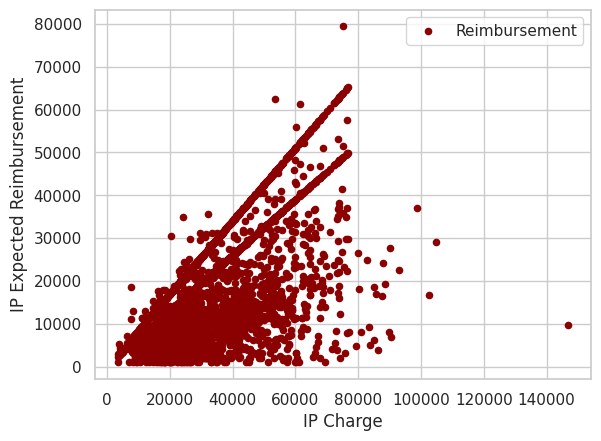

In [32]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

<ipython-input-33-7b284550e202>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (payer, prices) in enumerate(groups):


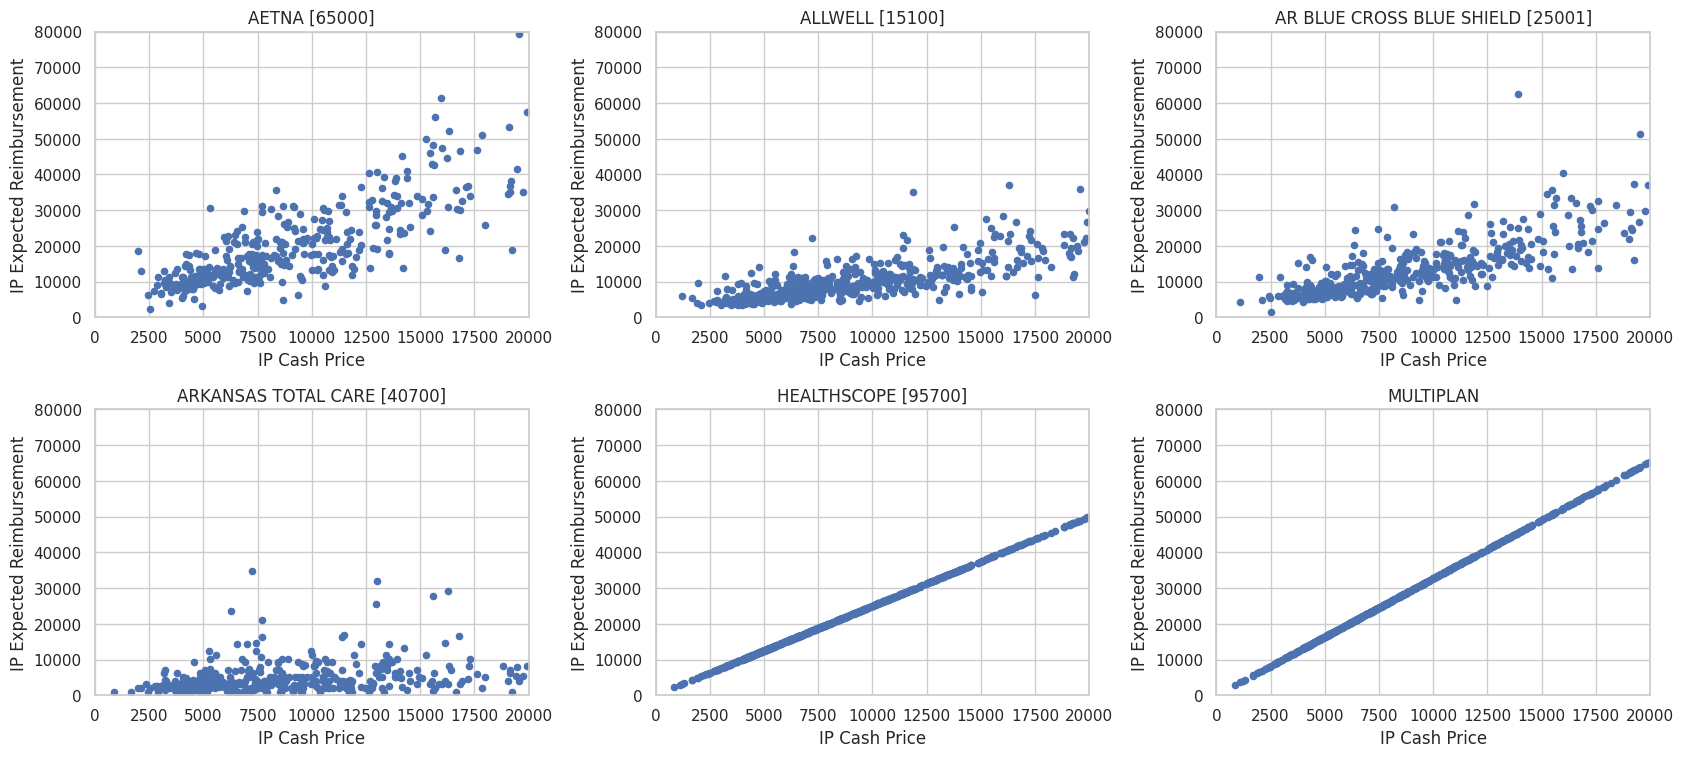

In [33]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:
There is a general positive correlation between the cash/charge prices and the expected reimbursement amount. As the initial prices go up, reimbursement also increases. However, the correlation appears moderately weak in both the overall dataset and when separated by payer groups. There is considerable scatter in the data. For a given cash or charge price, the reimbursement amount can vary substantially. No extremely tight relationship. The slope of the correlation differs between payers - it is steeper for some like AR BLUE CROSS BLUE SHIELD compared to others like HEALTHSCOPE. This indicates different rates of reimbursement growth as prices increase. The value ranges spanned on both axes varies significantly between payers. Some operate on lower scales while others go up to higher prices and reimbursements. In summary, the visualizations demonstrate a positively correlated but imperfect relationship between the pricing variables. There is nuance in how reimbursements are set from initial prices both overall and between different insurance providers. The analysis highlights the variability and complexity in the healthcare pricing and reimbursement system.


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv ('us_state_vaccinations.csv')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54628 entries, 0 to 54627
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 54628 non-null  object 
 1   location                             54628 non-null  object 
 2   total_vaccinations                   32532 non-null  float64
 3   total_distributed                    32272 non-null  float64
 4   people_vaccinated                    32268 non-null  float64
 5   people_fully_vaccinated_per_hundred  30651 non-null  float64
 6   total_vaccinations_per_hundred       30750 non-null  float64
 7   people_fully_vaccinated              32188 non-null  float64
 8   people_vaccinated_per_hundred        30726 non-null  float64
 9   distributed_per_hundred              30730 non-null  float64
 10  daily_vaccinations_raw               28354 non-null  float64
 11  daily_vaccinations          

In [36]:
data.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
       'total_boosters_per_hundred'],
      dtype='object')

In [37]:
data.shape

(54628, 16)

In [38]:
data.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [39]:
data.ndim

2

In [40]:
data.describe()

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
count,3.253200e+04,3.227200e+04,3.226800e+04,30651.000000,30750.000000,3.218800e+04,30726.000000,30730.000000,2.835400e+04,5.456300e+04,51716.000000,32272.0000,1.811600e+04,17254.000000
mean,1.185199e+07,1.498832e+07,5.909278e+06,47.332224,114.716897,4.891624e+06,56.573146,144.737661,3.738790e+04,2.511817e+04,2354.939400,0.7885,2.581003e+06,25.506608
std,5.198221e+07,6.626668e+07,2.508631e+07,22.037456,57.873521,2.118178e+07,23.492956,73.024391,1.838668e+05,1.351137e+05,2501.898146,0.1151,1.224190e+07,17.823518
min,4.160000e+02,6.000000e+03,4.010000e+02,0.000000,0.170000,1.000000e+00,0.240000,6.140000,0.000000e+00,0.000000e+00,0.000000,0.0430,1.100000e+01,0.000000
25%,9.277308e+05,1.188560e+06,5.043098e+05,34.240000,75.020000,3.723285e+05,42.590000,95.630000,1.075250e+03,1.036000e+03,627.000000,0.7420,1.453425e+05,10.292500
50%,3.199256e+06,4.051065e+06,1.730820e+06,52.280000,116.720000,1.349818e+06,60.605000,141.330000,6.845500e+03,4.253000e+03,1498.000000,0.7970,6.058635e+05,24.780000
75%,7.948546e+06,1.006490e+07,4.023565e+06,62.480000,154.387500,3.396357e+06,72.410000,196.387500,2.208800e+04,1.389500e+04,3172.000000,0.8520,1.799718e+06,36.800000
max,6.767288e+08,9.844443e+08,2.702272e+08,91.260000,302.850000,2.306373e+08,118.550000,414.900000,4.629928e+06,3.384387e+06,27652.000000,1.2760,1.929642e+08,104.040000


In [41]:
data.isnull()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,True,True,True,True,True,True,True,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54623,False,False,True,True,True,True,True,True,True,True,True,False,False,True,True,True
54624,False,False,True,True,True,True,True,True,True,True,True,False,False,True,True,True
54625,False,False,True,True,True,True,True,True,True,True,True,False,False,True,True,True
54626,False,False,True,True,True,True,True,True,True,True,True,False,False,True,True,True


In [42]:
data.drop_duplicates()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54623,2023-05-06,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,133.0,NaN,NaN,NaN
54624,2023-05-07,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,173.0,NaN,NaN,NaN
54625,2023-05-08,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,213.0,NaN,NaN,NaN
54626,2023-05-09,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,252.0,NaN,NaN,NaN


### Observations #1

_Double-click this text and then edit it to put in your observations_

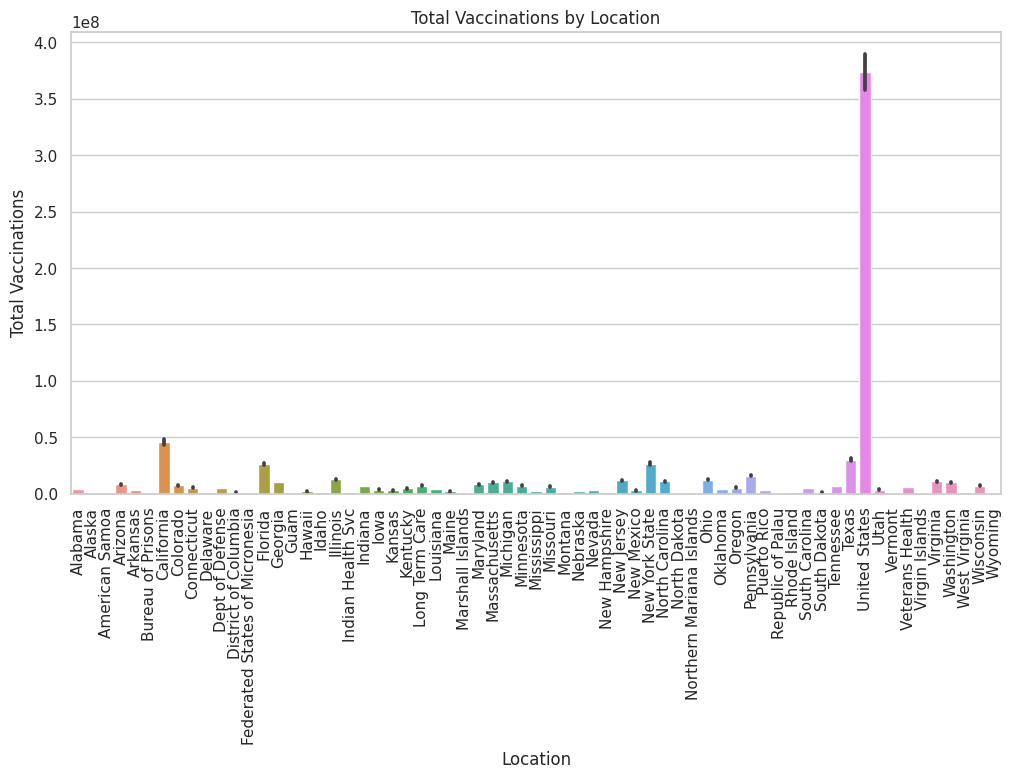

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='total_vaccinations', data=data)
plt.xticks(rotation=90)
plt.title('Total Vaccinations by Location')
plt.xlabel('Location')
plt.ylabel('Total Vaccinations')
plt.show()

### YOUR RESPONSE
 This bar plot showing the total vaccinations for each location. The x-axis will display the location names, and the y-axis will show the total number of vaccinations. Each bar will represent a different location, and the height of each bar will correspond to the total number of vaccinations in that location. This visualization can help you compare the vaccination rates across different locations and identify any disparities or trends.

### Observations #2

_Double-click this text and then edit it to put in your observations_

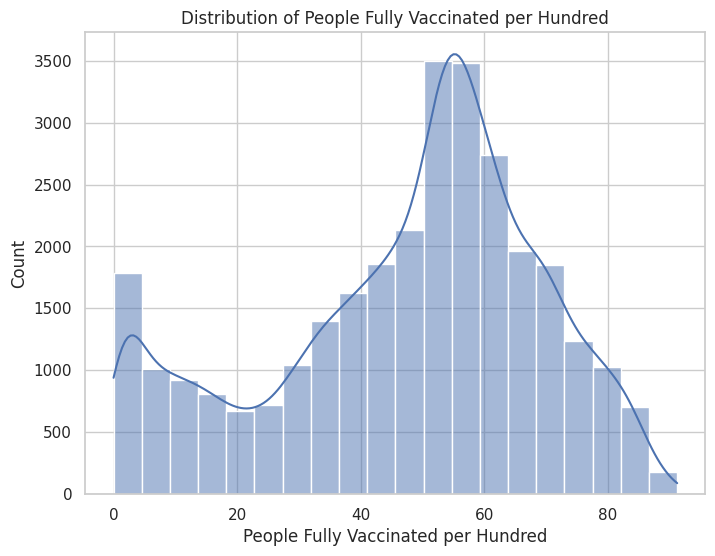

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(data['people_fully_vaccinated_per_hundred'], bins=20, kde=True)
plt.title('Distribution of People Fully Vaccinated per Hundred')
plt.xlabel('People Fully Vaccinated per Hundred')
plt.show()

### YOUR RESPONSE
A histogram with bars representing the distribution of the "people_fully_vaccinated_per_hundred" variable. The x-axis will show the range of "people_fully_vaccinated_per_hundred" values, and the height of the bars will indicate the frequency of data points falling into each bin. The KDE curve will provide a smooth estimate of the underlying distribution shape. This visualization can help you understand the distribution of vaccination rates per hundred people and identify any patterns or modes in the data.



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option